# Exploratory Data Analysis on a Dataset

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

# 1.Data Cleaning and Preparation:
●Load the dataset into a data frame or equivalent data structure.
●Handle missing values appropriately (e.g., imputation, deletion).
●Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
●Detect and treat outliers if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #it is python lib , It provides tools to create 2D (and limited 3D) plots of arrays and datasets
import seaborn as sns # it is also an python lib for data visualisation, and it lets you see patterns, distributions, and relationships quickly.

# As we have to set a style for the visualizations
sns.set_style("whitegrid") #White background with gridlines

# 1. Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Python excelr/Cardiotocographic.csv.xls")
print("\n--- Initial Structure ---")
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)




--- Initial Structure ---
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float6

# Data Cleaning and Preparation:

Handle missing values appropriately (e.g., imputation, deletion).

In [2]:
#handling missing values
df.fillna(df.median(),inplace=True)
df.isna().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


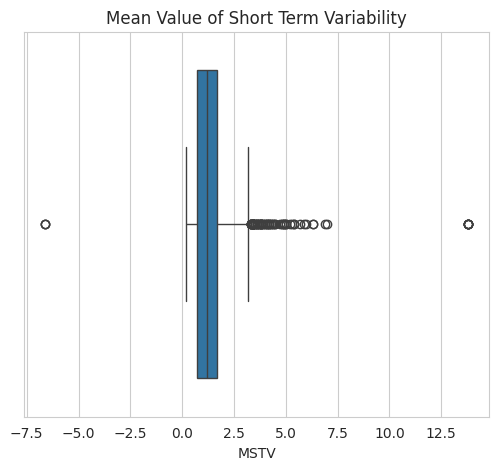

In [3]:
#visualization
plt.figure(figsize = (6,5))
sns.boxplot(x=df["MSTV"])
plt.title('Mean Value of Short Term Variability')
plt.xlabel('MSTV')
plt.show()

In [4]:
#Detect and treat outliers if necessary.
# calculate IQR for the outliers
Q1 = df['MSTV'].quantile(0.25)
Q3 = df['MSTV'].quantile(0.75)
IQR = Q3 - Q1 #it is the formula
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Detect outliers using IQR
outliers_iqr = df[(df['MSTV'] < lower_bound) | (df['MSTV'] > upper_bound)]
print(f"Number of outliers detected using IQR: {outliers_iqr.shape[0]}")

Number of outliers detected using IQR: 80


In [6]:
# Cap outliers
df['MSTV'] = df['MSTV'].clip(lower=lower_bound, upper=upper_bound)
#.clip() sets a minimum and maximum value
#Outliers are values that are much lower or higher than most of your data.sometimes, you want to limit extreme values so they don’t distort analysis or models.

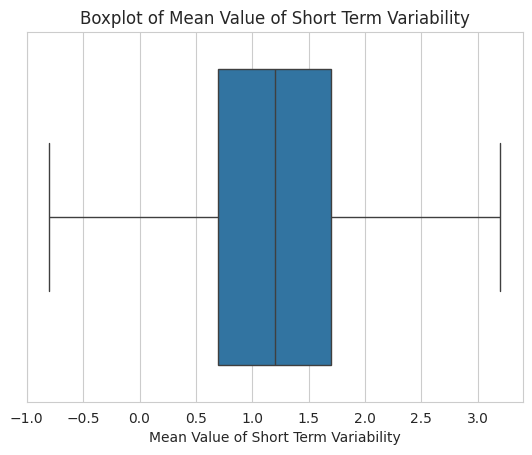

In [7]:
# Visualizing after removing the outliersplt.figure(figsize=(5,4))
sns.boxplot(x=df["MSTV"])
plt.title('Boxplot of Mean Value of Short Term Variability')
plt.xlabel('Mean Value of Short Term Variability')
plt.show()

# 2.Statistical Summary:

Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [8]:
#summary
# Initialize a dictionary to store the statistics
summary_stats = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]): #it has the api types for the dtypes
        # Calculate mean, median, standard deviation, and IQR
        mean = df[column].mean()
        median = df[column].median()
        std_dev = df[column].std()
        Q1 = df[column].quantile(0.25)
        Q3 =df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Store the results in the dictionary
        summary_stats[column] = {
            'Mean': mean,
            'Median': median,
            'Standard Deviation': std_dev,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        }

summary_df = pd.DataFrame(summary_stats).T
print(summary_df)

                Mean      Median  Standard Deviation          Q1          Q3  \
LB        133.340204  133.000000           11.214379  126.000000  140.000000   
AC          0.003204    0.001634            0.004373    0.000000    0.005606   
FM          0.009894    0.000000            0.067540    0.000000    0.002567   
UC          0.004391    0.004484            0.003340    0.001851    0.006536   
DL          0.001895    0.000000            0.003343    0.000000    0.003289   
DS          0.000002    0.000000            0.000141    0.000000    0.000000   
DP          0.000173    0.000000            0.000836    0.000000    0.000000   
ASTV       46.995984   49.000000           18.813973   32.000000   61.000000   
MSTV        1.304644    1.200000            0.781091    0.700000    1.700000   
ALTV        1.252640    0.000000            1.529543    0.000000    3.200000   
MLTV        8.276147    7.400000            7.734851    4.600000   10.800000   
Width      70.395387   67.000000        

# 3.Data Visualization:

These are the few data visualisation techquies

---


Histogram:Shows the frequency distribution of a continuous variable by dividing the data into bins and counting the occurrences in each bin.

---
Boxplot:Displays the five-number summary (minimum, Q1, median, Q3, maximum) and clearly highlights outliers outside the interquartile range (IQR).

---
Scatter plot:Shows the relationship between two continuous variables. Each point represents an observation.

---
Correlation heat map:Visualizes the entire correlation matrix for all numerical features, using color intensity to represent the strength and direction of the linear relationship (r value).

---
Pair plot :a data visualization tool that displays pairwise relationships and distributions between numerical variables in a dataset


In [ ]:
# Histogram for a specific column
plt.figure(figsize=(6, 4))
sns.histplot(df['LB'], kde=True)
plt.title('Distribution of Baseline Fetal Heart Rate')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Frequency')
plt.show()
# Boxplot for a specific column
plt.figure(figsize=(5, 4))
sns.boxplot(x=df['LB'])
plt.title('Boxplot of Baseline Fetal Heart Rate')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.show()
# Scatter plot between two variables
plt.figure(figsize=(5, 4))
sns.scatterplot(x=df['LB'], y=df['AC'])
plt.title('Scatter Plot of Baseline Fetal Heart Rate vs Accelerations')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Accelerations (AC)')
plt.show()
#correlation heat map
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
#pair plot
plt.figure(figsize=(4,4))
sns.pairplot(df[['LB', 'AC', 'FM', 'UC']])
plt.show()

# 4.Pattern Recognition and Insights:

Identify any correlations between variables and discuss their potential implications ,Look for trends or patterns over time if temporal data is available.

In [10]:
#Correlation measures how strongly two numerical variables are related to each other.It tells you whether and how one variable moves when the other changes.
correlation_matrix = df.corr()
print(correlation_matrix) #The .corr() method in pandas is used to compute the correlation matrix for a DataFrame.

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062813  0.018807 -0.166229 -0.126563 -0.005432   
AC       -0.062813  1.000000  0.009768  0.071621 -0.093449 -0.033088   
FM        0.018807  0.009768  1.000000 -0.053226  0.009718  0.029916   
UC       -0.166229  0.071621 -0.053226  1.000000  0.190128 -0.006938   
DL       -0.126563 -0.093449  0.009718  0.190128  1.000000  0.058413   
DS       -0.005432 -0.033088  0.029916 -0.006938  0.058413  1.000000   
DP       -0.047650 -0.083298  0.121459  0.070295  0.144717  0.004321   
ASTV      0.241857 -0.230470 -0.032691 -0.181161 -0.069361  0.008426   
MSTV     -0.261508  0.196240  0.045612  0.267048  0.501842  0.025428   
ALTV      0.266965 -0.377524 -0.048147 -0.255626 -0.303028 -0.014504   
MLTV     -0.003423 -0.104853 -0.006121 -0.049452 -0.165293  0.034367   
Width    -0.118397  0.234549  0.097282  0.107083  0.408578  0.040845   
Tendency  0.236730  0.031710 -0.017819 -0.066832 -0.023914 -0.01

# 5.Conclusion:


●Summarize the key insights and patterns discovered through your exploratory analysis.

---


●Discuss how these findings could impact decision-making or further analyses.



* 1. Data Quality & Cleaning: Missing values were handled via median imputation. Outliers were detected using Box Plots/IQR method and treated by capping extreme values to reduce skew and ensure data robustness.
* 2. Statistical Insights: Computed key summary statistics (mean, median, std dev, IQR), which identified potential skewness in the distributions (where mean = median).
* 3. Data Visualization: Used Box Plots to confirm outlier presence and Histograms with KDE to visually confirm skewness and analyze feature distributions (e.g., LB).